In [1]:
# OBJECTIVE IS c.shape (18142, 4) with an RGBA value for each cerebellar voxel
#(0, 0, 'CIFTI_STRUCTURE_CORTEX_LEFT')
#(1, 29696, 'CIFTI_STRUCTURE_CORTEX_RIGHT')
#(2, 59412, 'CIFTI_STRUCTURE_ACCUMBENS_LEFT')
#(3, 59547, 'CIFTI_STRUCTURE_ACCUMBENS_RIGHT')
#(4, 59687, 'CIFTI_STRUCTURE_AMYGDALA_LEFT')
#(5, 60002, 'CIFTI_STRUCTURE_AMYGDALA_RIGHT')
#(6, 60334, 'CIFTI_STRUCTURE_BRAIN_STEM')
#(7, 63806, 'CIFTI_STRUCTURE_CAUDATE_LEFT')
#(8, 64534, 'CIFTI_STRUCTURE_CAUDATE_RIGHT')
#(9, 65289, 'CIFTI_STRUCTURE_CEREBELLUM_LEFT')
#(10, 73998, 'CIFTI_STRUCTURE_CEREBELLUM_RIGHT')
#(11, 83142, 'CIFTI_STRUCTURE_DIENCEPHALON_VENTRAL_LEFT')
#(12, 83848, 'CIFTI_STRUCTURE_DIENCEPHALON_VENTRAL_RIGHT')
#(13, 84560, 'CIFTI_STRUCTURE_HIPPOCAMPUS_LEFT')
#(14, 85324, 'CIFTI_STRUCTURE_HIPPOCAMPUS_RIGHT')
#(15, 86119, 'CIFTI_STRUCTURE_PALLIDUM_LEFT')
#(16, 86416, 'CIFTI_STRUCTURE_PALLIDUM_RIGHT')
#(17, 86676, 'CIFTI_STRUCTURE_PUTAMEN_LEFT')
#(18, 87736, 'CIFTI_STRUCTURE_PUTAMEN_RIGHT')
#(19, 88746, 'CIFTI_STRUCTURE_THALAMUS_LEFT')
#(20, 90034, 'CIFTI_STRUCTURE_THALAMUS_RIGHT')

In [2]:
#### to resample Morel atlas to HCP space:
## use fsl's flirt to resample to 2mm (which is the functional resolution of HCP):
# flirt -in AD.nii -ref AD.nii -out AD_2mm.nii -applyisoxfm 2 -noresampblur
## the "noresampblur" is important, otherwise the parcels become much bigger after resampling
## then use a template to bring it to the space of HCP:
# /Applications/workbench/bin_macosx64/wb_command -cifti-create-dense-from-template cohendmapemotion.dscalar.nii AD.dscalar.nii -volume THALAMUS_LEFT AD_2mm.nii


In [1]:
cd /om/user/xaviergp

/om/user/xaviergp


In [2]:
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import sys
import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'

import sys
sys.path.append('gradient_data/src/')

/om/user/xaviergp/env/xavier_env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
AD_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/AD.dscalar.nii').get_data()
AM_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/AM.dscalar.nii').get_data()
AV_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/AV.dscalar.nii').get_data()
CeM_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/CeM.dscalar.nii').get_data()
CL_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/CL.dscalar.nii').get_data()
CM_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/CM.dscalar.nii').get_data()
global_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/global.dscalar.nii').get_data()
Hb_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/Hb.dscalar.nii').get_data()
LD_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/LD.dscalar.nii').get_data()
LGNmc_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/LGNmc.dscalar.nii').get_data()
LGNpc_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/LGNpc.dscalar.nii').get_data()
Li_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/Li.dscalar.nii').get_data()
LP_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/LP.dscalar.nii').get_data()
MAX_VOLUME_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/MAX_VOLUME.dscalar.nii').get_data()
MDmc_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/MDmc.dscalar.nii').get_data()
MDpc_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/MDpc.dscalar.nii').get_data()
MGN_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/MGN.dscalar.nii').get_data()
mtt_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/mtt.dscalar.nii').get_data()
MV_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/MV.dscalar.nii').get_data()
Pf_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/Pf.dscalar.nii').get_data()
Po_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/Po.dscalar.nii').get_data()
PuA_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/PuA.dscalar.nii').get_data()
PuI_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/PuI.dscalar.nii').get_data()
PuL_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/PuL.dscalar.nii').get_data()
PuM_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/PuM.dscalar.nii').get_data()
Pv_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/Pv.dscalar.nii').get_data()
RN_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/RN.dscalar.nii').get_data()
SG_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/SG.dscalar.nii').get_data()
sPf_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/sPf.dscalar.nii').get_data()
STh_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/STh.dscalar.nii').get_data()
thalamus_body_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/thalamus_body.dscalar.nii').get_data()
VAmc_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/VAmc.dscalar.nii').get_data()
VApc_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/VApc.dscalar.nii').get_data()
VLa_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/VLa.dscalar.nii').get_data()
VLpd_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/VLpd.dscalar.nii').get_data()
VLpv_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/VLpv.dscalar.nii').get_data()
VM_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/VM.dscalar.nii').get_data()
VPI_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/VPI.dscalar.nii').get_data()
VPLa_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/VPLa.dscalar.nii').get_data()
VPLp_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/VPLp.dscalar.nii').get_data()
VPM_left = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/leftthalamus_atlas_dscalar2mmHCPspace/VPM.dscalar.nii').get_data()
AD_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/AD.dscalar.nii').get_data()
AM_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/AM.dscalar.nii').get_data()
AV_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/AV.dscalar.nii').get_data()
CeM_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/CeM.dscalar.nii').get_data()
CL_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/CL.dscalar.nii').get_data()
CM_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/CM.dscalar.nii').get_data()
global_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/global.dscalar.nii').get_data()
Hb_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/Hb.dscalar.nii').get_data()
LD_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/LD.dscalar.nii').get_data()
LGNmc_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/LGNmc.dscalar.nii').get_data()
LGNpc_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/LGNpc.dscalar.nii').get_data()
Li_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/Li.dscalar.nii').get_data()
LP_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/LP.dscalar.nii').get_data()
MAX_VOLUME_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/MAX_VOLUME.dscalar.nii').get_data()
MDmc_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/MDmc.dscalar.nii').get_data()
MDpc_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/MDpc.dscalar.nii').get_data()
MGN_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/MGN.dscalar.nii').get_data()
mtt_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/mtt.dscalar.nii').get_data()
MV_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/MV.dscalar.nii').get_data()
Pf_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/Pf.dscalar.nii').get_data()
Po_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/Po.dscalar.nii').get_data()
PuA_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/PuA.dscalar.nii').get_data()
PuI_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/PuI.dscalar.nii').get_data()
PuL_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/PuL.dscalar.nii').get_data()
PuM_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/PuM.dscalar.nii').get_data()
Pv_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/Pv.dscalar.nii').get_data()
RN_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/RN.dscalar.nii').get_data()
SG_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/SG.dscalar.nii').get_data()
sPf_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/sPf.dscalar.nii').get_data()
STh_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/STh.dscalar.nii').get_data()
thalamus_body_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/thalamus_body.dscalar.nii').get_data()
VAmc_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/VAmc.dscalar.nii').get_data()
VApc_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/VApc.dscalar.nii').get_data()
VLa_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/VLa.dscalar.nii').get_data()
VLpd_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/VLpd.dscalar.nii').get_data()
VLpv_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/VLpv.dscalar.nii').get_data()
VM_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/VM.dscalar.nii').get_data()
VPI_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/VPI.dscalar.nii').get_data()
VPLa_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/VPLa.dscalar.nii').get_data()
VPLp_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/VPLp.dscalar.nii').get_data()
VPM_right = nib.load('/om/project/UCT1/thalamus_gradients/MorelAtlas_dscalar2mmHCPspace/rightthalamus_atlas_dscalar2mmHCPspace/VPM.dscalar.nii').get_data()

#JDS_associative_left = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_left/JDS_associative_bin.dscalar.nii').get_data()
#JDS_effector_left = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_left/JDS_effector_bin.dscalar.nii').get_data()
#JDS_intralaminar_left = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_left/JDS_intralaminar_bin.dscalar.nii').get_data()
#JDS_limbic_left = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_left/JDS_limbic_bin.dscalar.nii').get_data()
#JDS_specsensory_left = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_left/JDS_specsensory_bin.dscalar.nii').get_data()
#JDS_associative_right = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_right/JDS_associative_bin.dscalar.nii').get_data()
#JDS_effector_right = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_right/JDS_effector_bin.dscalar.nii').get_data()
#JDS_intralaminar_right = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_right/JDS_intralaminar_bin.dscalar.nii').get_data()
#JDS_limbic_right = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_right/JDS_limbic_bin.dscalar.nii').get_data()
#JDS_specsensory_right = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_right/JDS_specsensory_bin.dscalar.nii').get_data()

## load the files that are already without overlap
#JDS_associative_left = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_left/JDS_associative_bin_nooverlap.dscalar.nii').get_data()
#JDS_effector_left = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_left/JDS_effector_bin_nooverlap.dscalar.nii').get_data()
#JDS_intralaminar_left = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_left/JDS_intralaminar_bin_nooverlap.dscalar.nii').get_data()
#JDS_limbic_left = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_left/JDS_limbic_bin_nooverlap.dscalar.nii').get_data()
#JDS_specsensory_left = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_left/JDS_specsensory_bin_nooverlap.dscalar.nii').get_data()
#JDS_associativeminusMD_left = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_left/JDS_associative_minusMD_bin_nooverlap.dscalar.nii').get_data()
#JDS_associative_right = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_right/JDS_associative_bin_nooverlap.dscalar.nii').get_data()
#JDS_effector_right = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_right/JDS_effector_bin_nooverlap.dscalar.nii').get_data()
#JDS_intralaminar_right = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_right/JDS_intralaminar_bin_nooverlap.dscalar.nii').get_data()
#JDS_limbic_right = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_right/JDS_limbic_bin_nooverlap.dscalar.nii').get_data()
#JDS_specsensory_right = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_right/JDS_specsensory_bin_nooverlap.dscalar.nii').get_data()
#JDS_associativeminusMD_right = nib.load('/om/project/UCT1/thalamus_gradients/JDSatlas_dscalar2mmHCPspace/JDSatlas_right/JDS_associative_minusMD_bin_nooverlap.dscalar.nii').get_data()


#JDS_associativejustMD_left = JDS_associative_left - JDS_associativeminusMD_left
#JDS_associativejustMD_right = JDS_associative_right - JDS_associativeminusMD_right


In [4]:
AD_left = AD_left[0]
AM_left = AM_left[0]
AV_left = AV_left[0]
CeM_left = CeM_left[0]
CL_left = CL_left[0]
CM_left = CM_left[0]
global_left = global_left[0]
Hb_left = Hb_left[0]
LD_left = LD_left[0]
LGNmc_left = LGNmc_left[0]
LGNpc_left = LGNpc_left[0]
Li_left = Li_left[0]
LP_left = LP_left[0]
MAX_VOLUME_left = MAX_VOLUME_left[0]
MDmc_left = MDmc_left[0]
MDpc_left = MDpc_left[0]
MGN_left = MGN_left[0]
mtt_left = mtt_left[0]
MV_left = MV_left[0]
Pf_left = Pf_left[0]
Po_left = Po_left[0]
PuA_left = PuA_left[0]
PuI_left = PuI_left[0]
PuL_left = PuL_left[0]
PuM_left = PuM_left[0]
Pv_left = Pv_left[0]
RN_left = RN_left[0]
SG_left = SG_left[0]
sPf_left = sPf_left[0]
STh_left = STh_left[0]
thalamus_body_left = thalamus_body_left[0]
VAmc_left = VAmc_left[0]
VApc_left = VApc_left[0]
VLa_left = VLa_left[0]
VLpd_left = VLpd_left[0]
VLpv_left = VLpv_left[0]
VM_left = VM_left[0]
VPI_left = VPI_left[0]
VPLa_left = VPLa_left[0]
VPLp_left = VPLp_left[0]
VPM_left = VPM_left[0]
AD_right = AD_right[0]
AM_right = AM_right[0]
AV_right = AV_right[0]
CeM_right = CeM_right[0]
CL_right = CL_right[0]
CM_right = CM_right[0]
global_right = global_right[0]
Hb_right = Hb_right[0]
LD_right = LD_right[0]
LGNmc_right = LGNmc_right[0]
LGNpc_right = LGNpc_right[0]
Li_right = Li_right[0]
LP_right = LP_right[0]
MAX_VOLUME_right = MAX_VOLUME_right[0]
MDmc_right = MDmc_right[0]
MDpc_right = MDpc_right[0]
MGN_right = MGN_right[0]
mtt_right = mtt_right[0]
MV_right = MV_right[0]
Pf_right = Pf_right[0]
Po_right = Po_right[0]
PuA_right = PuA_right[0]
PuI_right = PuI_right[0]
PuL_right = PuL_right[0]
PuM_right = PuM_right[0]
Pv_right = Pv_right[0]
RN_right = RN_right[0]
SG_right = SG_right[0]
sPf_right = sPf_right[0]
STh_right = STh_right[0]
thalamus_body_right = thalamus_body_right[0]
VAmc_right = VAmc_right[0]
VApc_right = VApc_right[0]
VLa_right = VLa_right[0]
VLpd_right = VLpd_right[0]
VLpv_right = VLpv_right[0]
VM_right = VM_right[0]
VPI_right = VPI_right[0]
VPLa_right = VPLa_right[0]
VPLp_right = VPLp_right[0]
VPM_right = VPM_right[0]

AD_right = AD_right[88746:91282]
AM_right = AM_right[88746:91282]
AV_right = AV_right[88746:91282]
CeM_right = CeM_right[88746:91282]
CL_right = CL_right[88746:91282]
CM_right = CM_right[88746:91282]
global_right = global_right[88746:91282]
Hb_right = Hb_right[88746:91282]
LD_right = LD_right[88746:91282]
LGNmc_right = LGNmc_right[88746:91282]
LGNpc_right = LGNpc_right[88746:91282]
Li_right = Li_right[88746:91282]
LP_right = LP_right[88746:91282]
MAX_VOLUME_right = MAX_VOLUME_right[88746:91282]
MDmc_right = MDmc_right[88746:91282]
MDpc_right = MDpc_right[88746:91282]
MGN_right = MGN_right[88746:91282]
mtt_right = mtt_right[88746:91282]
MV_right = MV_right[88746:91282]
Pf_right = Pf_right[88746:91282]
Po_right = Po_right[88746:91282]
PuA_right = PuA_right[88746:91282]
PuI_right = PuI_right[88746:91282]
PuL_right = PuL_right[88746:91282]
PuM_right = PuM_right[88746:91282]
Pv_right = Pv_right[88746:91282]
RN_right = RN_right[88746:91282]
SG_right = SG_right[88746:91282]
sPf_right = sPf_right[88746:91282]
STh_right = STh_right[88746:91282]
thalamus_body_right = thalamus_body_right[88746:91282]
VAmc_right = VAmc_right[88746:91282]
VApc_right = VApc_right[88746:91282]
VLa_right = VLa_right[88746:91282]
VLpd_right = VLpd_right[88746:91282]
VLpv_right = VLpv_right[88746:91282]
VM_right = VM_right[88746:91282]
VPI_right = VPI_right[88746:91282]
VPLa_right = VPLa_right[88746:91282]
VPLp_right = VPLp_right[88746:91282]
VPM_right = VPM_right[88746:91282]
AD_left = AD_left[88746:91282]
AM_left = AM_left[88746:91282]
AV_left = AV_left[88746:91282]
CeM_left = CeM_left[88746:91282]
CL_left = CL_left[88746:91282]
CM_left = CM_left[88746:91282]
global_left = global_left[88746:91282]
Hb_left = Hb_left[88746:91282]
LD_left = LD_left[88746:91282]
LGNmc_left = LGNmc_left[88746:91282]
LGNpc_left = LGNpc_left[88746:91282]
Li_left = Li_left[88746:91282]
LP_left = LP_left[88746:91282]
MAX_VOLUME_left = MAX_VOLUME_left[88746:91282]
MDmc_left = MDmc_left[88746:91282]
MDpc_left = MDpc_left[88746:91282]
MGN_left = MGN_left[88746:91282]
mtt_left = mtt_left[88746:91282]
MV_left = MV_left[88746:91282]
Pf_left = Pf_left[88746:91282]
Po_left = Po_left[88746:91282]
PuA_left = PuA_left[88746:91282]
PuI_left = PuI_left[88746:91282]
PuL_left = PuL_left[88746:91282]
PuM_left = PuM_left[88746:91282]
Pv_left = Pv_left[88746:91282]
RN_left = RN_left[88746:91282]
SG_left = SG_left[88746:91282]
sPf_left = sPf_left[88746:91282]
STh_left = STh_left[88746:91282]
thalamus_body_left = thalamus_body_left[88746:91282]
VAmc_left = VAmc_left[88746:91282]
VApc_left = VApc_left[88746:91282]
VLa_left = VLa_left[88746:91282]
VLpd_left = VLpd_left[88746:91282]
VLpv_left = VLpv_left[88746:91282]
VM_left = VM_left[88746:91282]
VPI_left = VPI_left[88746:91282]
VPLa_left = VPLa_left[88746:91282]
VPLp_left = VPLp_left[88746:91282]
VPM_left = VPM_left[88746:91282]

AD_left[AD_left > 0.000001] = 1
AM_left[AM_left > 0.000001] = 1
AV_left[AV_left > 0.000001] = 1
CeM_left[CeM_left > 0.000001] = 1
CL_left[CL_left > 0.000001] = 1
CM_left[CM_left > 0.000001] = 1
global_left[global_left > 0.000001] = 1
Hb_left[Hb_left > 0.000001] = 1
LD_left[LD_left > 0.000001] = 1
LGNmc_left[LGNmc_left > 0.000001] = 1
LGNpc_left[LGNpc_left > 0.000001] = 1
Li_left[Li_left > 0.000001] = 1
LP_left[LP_left > 0.000001] = 1
MAX_VOLUME_left[MAX_VOLUME_left > 0.000001] = 1
MDmc_left[MDmc_left > 0.000001] = 1
MDpc_left[MDpc_left > 0.000001] = 1
MGN_left[MGN_left > 0.000001] = 1
mtt_left[mtt_left > 0.000001] = 1
MV_left[MV_left > 0.000001] = 1
Pf_left[Pf_left > 0.000001] = 1
Po_left[Po_left > 0.000001] = 1
PuA_left[PuA_left > 0.000001] = 1
PuI_left[PuI_left > 0.000001] = 1
PuL_left[PuL_left > 0.000001] = 1
PuM_left[PuM_left > 0.000001] = 1
Pv_left[Pv_left > 0.000001] = 1
RN_left[RN_left > 0.000001] = 1
SG_left[SG_left > 0.000001] = 1
sPf_left[sPf_left > 0.000001] = 1
STh_left[STh_left > 0.000001] = 1
thalamus_body_left[thalamus_body_left > 0.000001] = 1
VAmc_left[VAmc_left > 0.000001] = 1
VApc_left[VApc_left > 0.000001] = 1
VLa_left[VLa_left > 0.000001] = 1
VLpd_left[VLpd_left > 0.000001] = 1
VLpv_left[VLpv_left > 0.000001] = 1
VM_left[VM_left > 0.000001] = 1
VPI_left[VPI_left > 0.000001] = 1
VPLa_left[VPLa_left > 0.000001] = 1
VPLp_left[VPLp_left > 0.000001] = 1
VPM_left[VPM_left > 0.000001] = 1
AD_right[AD_right > 0.000001] = 1
AM_right[AM_right > 0.000001] = 1
AV_right[AV_right > 0.000001] = 1
CeM_right[CeM_right > 0.000001] = 1
CL_right[CL_right > 0.000001] = 1
CM_right[CM_right > 0.000001] = 1
global_right[global_right > 0.000001] = 1
Hb_right[Hb_right > 0.000001] = 1
LD_right[LD_right > 0.000001] = 1
LGNmc_right[LGNmc_right > 0.000001] = 1
LGNpc_right[LGNpc_right > 0.000001] = 1
Li_right[Li_right > 0.000001] = 1
LP_right[LP_right > 0.000001] = 1
MAX_VOLUME_right[MAX_VOLUME_right > 0.000001] = 1
MDmc_right[MDmc_right > 0.000001] = 1
MDpc_right[MDpc_right > 0.000001] = 1
MGN_right[MGN_right > 0.000001] = 1
mtt_right[mtt_right > 0.000001] = 1
MV_right[MV_right > 0.000001] = 1
Pf_right[Pf_right > 0.000001] = 1
Po_right[Po_right > 0.000001] = 1
PuA_right[PuA_right > 0.000001] = 1
PuI_right[PuI_right > 0.000001] = 1
PuL_right[PuL_right > 0.000001] = 1
PuM_right[PuM_right > 0.000001] = 1
Pv_right[Pv_right > 0.000001] = 1
RN_right[RN_right > 0.000001] = 1
SG_right[SG_right > 0.000001] = 1
sPf_right[sPf_right > 0.000001] = 1
STh_right[STh_right > 0.000001] = 1
thalamus_body_right[thalamus_body_right > 0.000001] = 1
VAmc_right[VAmc_right > 0.000001] = 1
VApc_right[VApc_right > 0.000001] = 1
VLa_right[VLa_right > 0.000001] = 1
VLpd_right[VLpd_right > 0.000001] = 1
VLpv_right[VLpv_right > 0.000001] = 1
VM_right[VM_right > 0.000001] = 1
VPI_right[VPI_right > 0.000001] = 1
VPLa_right[VPLa_right > 0.000001] = 1
VPLp_right[VPLp_right > 0.000001] = 1
VPM_right[VPM_right > 0.000001] = 1

In [5]:
res = nib.load('/om/project/UCT1/GRADIENTPROJECT/GRADIENT_PROJECT/python_notebooks_final/cerebellumgradient_initialfiles/result_thalamus_bilateral.dscalar.nii').get_data()
res.shape = (14, 2536)
#res_oneline = res.reshape((-1, 1))
res_component1 = res[0]
res_component2 = res[1]
res_component3 = res[2]
res_component4 = res[3]

In [6]:
g1values_AD_right = res_component1[AD_right>0.5]
g1values_AM_right = res_component1[AM_right>0.5]
g1values_AV_right = res_component1[AV_right>0.5]
g1values_CeM_right = res_component1[CeM_right>0.5]
g1values_CL_right = res_component1[CL_right>0.5]
g1values_CM_right = res_component1[CM_right>0.5]
g1values_global_right = res_component1[global_right>0.5]
g1values_Hb_right = res_component1[Hb_right>0.5]
g1values_LD_right = res_component1[LD_right>0.5]
g1values_LGNmc_right = res_component1[LGNmc_right>0.5]
g1values_LGNpc_right = res_component1[LGNpc_right>0.5]
g1values_Li_right = res_component1[Li_right>0.5]
g1values_LP_right = res_component1[LP_right>0.5]
g1values_MAX_VOLUME_right = res_component1[MAX_VOLUME_right>0.5]
g1values_MDmc_right = res_component1[MDmc_right>0.5]
g1values_MDpc_right = res_component1[MDpc_right>0.5]
g1values_MGN_right = res_component1[MGN_right>0.5]
g1values_mtt_right = res_component1[mtt_right>0.5]
g1values_MV_right = res_component1[MV_right>0.5]
g1values_Pf_right = res_component1[Pf_right>0.5]
g1values_Po_right = res_component1[Po_right>0.5]
g1values_PuA_right = res_component1[PuA_right>0.5]
g1values_PuI_right = res_component1[PuI_right>0.5]
g1values_PuL_right = res_component1[PuL_right>0.5]
g1values_PuM_right = res_component1[PuM_right>0.5]
g1values_Pv_right = res_component1[Pv_right>0.5]
g1values_RN_right = res_component1[RN_right>0.5]
g1values_SG_right = res_component1[SG_right>0.5]
g1values_sPf_right = res_component1[sPf_right>0.5]
g1values_STh_right = res_component1[STh_right>0.5]
g1values_thalamus_body_right = res_component1[thalamus_body_right>0.5]
g1values_VAmc_right = res_component1[VAmc_right>0.5]
g1values_VApc_right = res_component1[VApc_right>0.5]
g1values_VLa_right = res_component1[VLa_right>0.5]
g1values_VLpd_right = res_component1[VLpd_right>0.5]
g1values_VLpv_right = res_component1[VLpv_right>0.5]
g1values_VM_right = res_component1[VM_right>0.5]
g1values_VPI_right = res_component1[VPI_right>0.5]
g1values_VPLa_right = res_component1[VPLa_right>0.5]
g1values_VPLp_right = res_component1[VPLp_right>0.5]
g1values_VPM_right = res_component1[VPM_right>0.5]
g1values_AD_left = res_component1[AD_left>0.5]
g1values_AM_left = res_component1[AM_left>0.5]
g1values_AV_left = res_component1[AV_left>0.5]
g1values_CeM_left = res_component1[CeM_left>0.5]
g1values_CL_left = res_component1[CL_left>0.5]
g1values_CM_left = res_component1[CM_left>0.5]
g1values_global_left = res_component1[global_left>0.5]
g1values_Hb_left = res_component1[Hb_left>0.5]
g1values_LD_left = res_component1[LD_left>0.5]
g1values_LGNmc_left = res_component1[LGNmc_left>0.5]
g1values_LGNpc_left = res_component1[LGNpc_left>0.5]
g1values_Li_left = res_component1[Li_left>0.5]
g1values_LP_left = res_component1[LP_left>0.5]
g1values_MAX_VOLUME_left = res_component1[MAX_VOLUME_left>0.5]
g1values_MDmc_left = res_component1[MDmc_left>0.5]
g1values_MDpc_left = res_component1[MDpc_left>0.5]
g1values_MGN_left = res_component1[MGN_left>0.5]
g1values_mtt_left = res_component1[mtt_left>0.5]
g1values_MV_left = res_component1[MV_left>0.5]
g1values_Pf_left = res_component1[Pf_left>0.5]
g1values_Po_left = res_component1[Po_left>0.5]
g1values_PuA_left = res_component1[PuA_left>0.5]
g1values_PuI_left = res_component1[PuI_left>0.5]
g1values_PuL_left = res_component1[PuL_left>0.5]
g1values_PuM_left = res_component1[PuM_left>0.5]
g1values_Pv_left = res_component1[Pv_left>0.5]
g1values_RN_left = res_component1[RN_left>0.5]
g1values_SG_left = res_component1[SG_left>0.5]
g1values_sPf_left = res_component1[sPf_left>0.5]
g1values_STh_left = res_component1[STh_left>0.5]
g1values_thalamus_body_left = res_component1[thalamus_body_left>0.5]
g1values_VAmc_left = res_component1[VAmc_left>0.5]
g1values_VApc_left = res_component1[VApc_left>0.5]
g1values_VLa_left = res_component1[VLa_left>0.5]
g1values_VLpd_left = res_component1[VLpd_left>0.5]
g1values_VLpv_left = res_component1[VLpv_left>0.5]
g1values_VM_left = res_component1[VM_left>0.5]
g1values_VPI_left = res_component1[VPI_left>0.5]
g1values_VPLa_left = res_component1[VPLa_left>0.5]
g1values_VPLp_left = res_component1[VPLp_left>0.5]
g1values_VPM_left = res_component1[VPM_left>0.5]

/om/user/xaviergp/env/xavier_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


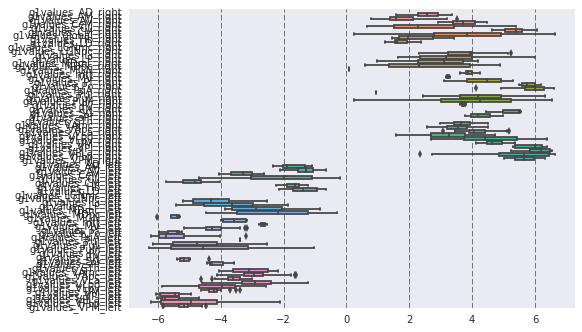

In [7]:
import seaborn as sns

datatoplot = [g1values_AD_right,g1values_AM_right,g1values_AV_right,g1values_CeM_right,g1values_CL_right,g1values_CM_right,g1values_global_right,g1values_Hb_right,g1values_LD_right,g1values_LGNmc_right,g1values_LGNpc_right,g1values_Li_right,g1values_LP_right,g1values_MDmc_right,g1values_MDpc_right,g1values_MGN_right,g1values_mtt_right,g1values_MV_right,g1values_Pf_right,g1values_Po_right,g1values_PuA_right,g1values_PuI_right,g1values_PuL_right,g1values_PuM_right,g1values_Pv_right,g1values_RN_right,g1values_SG_right,g1values_sPf_right,g1values_STh_right,g1values_VAmc_right,g1values_VApc_right,g1values_VLa_right,g1values_VLpd_right,g1values_VLpv_right,g1values_VM_right,g1values_VPI_right,g1values_VPLa_right,g1values_VPLp_right,g1values_VPM_right,g1values_AD_left,g1values_AM_left,g1values_AV_left,g1values_CeM_left,g1values_CL_left,g1values_CM_left,g1values_Hb_left,g1values_LD_left,g1values_LGNmc_left,g1values_LGNpc_left,g1values_Li_left,g1values_LP_left,g1values_MDmc_left,g1values_MDpc_left,g1values_MGN_left,g1values_mtt_left,g1values_MV_left,g1values_Pf_left,g1values_Po_left,g1values_PuA_left,g1values_PuI_left,g1values_PuL_left,g1values_PuM_left,g1values_Pv_left,g1values_RN_left,g1values_SG_left,g1values_sPf_left,g1values_STh_left,g1values_VAmc_left,g1values_VApc_left,g1values_VLa_left,g1values_VLpd_left,g1values_VLpv_left,g1values_VM_left,g1values_VPI_left,g1values_VPLa_left,g1values_VPLp_left, g1values_VPM_left]
labels = ['g1values_AD_right','g1values_AM_right','g1values_AV_right','g1values_CeM_right','g1values_CL_right','g1values_CM_right','g1values_global_right','g1values_Hb_right','g1values_LD_right','g1values_LGNmc_right','g1values_LGNpc_right','g1values_Li_right','g1values_LP_right','g1values_MDmc_right','g1values_MDpc_right','g1values_MGN_right','g1values_mtt_right','g1values_MV_right','g1values_Pf_right','g1values_Po_right','g1values_PuA_right','g1values_PuI_right','g1values_PuL_right','g1values_PuM_right','g1values_Pv_right','g1values_RN_right','g1values_SG_right','g1values_sPf_right','g1values_STh_right','g1values_VAmc_right','g1values_VApc_right','g1values_VLa_right','g1values_VLpd_right','g1values_VLpv_right','g1values_VM_right','g1values_VPI_right','g1values_VPLa_right','g1values_VPLp_right','g1values_VPM_right','g1values_AD_left','g1values_AM_left','g1values_AV_left','g1values_CeM_left','g1values_CL_left','g1values_CM_left','g1values_Hb_left','g1values_LD_left','g1values_LGNmc_left','g1values_LGNpc_left','g1values_Li_left','g1values_LP_left','g1values_MDmc_left','g1values_MDpc_left','g1values_MGN_left','g1values_mtt_left','g1values_MV_left','g1values_Pf_left','g1values_Po_left','g1values_PuA_left','g1values_PuI_left','g1values_PuL_left','g1values_PuM_left','g1values_Pv_left','g1values_RN_left','g1values_SG_left','g1values_sPf_left','g1values_STh_left','g1values_VAmc_left','g1values_VApc_left','g1values_VLa_left','g1values_VLpd_left','g1values_VLpv_left','g1values_VM_left','g1values_VPI_left','g1values_VPLa_left','g1values_VPLp_left','g1values_VPM_left']
#ax = sns.boxplot(data=datatoplot, whis=999999999, orient='h', saturation=0.8)
ax = sns.boxplot(data=datatoplot, orient='h', saturation=0.8)
#sns.set_palette(cols)
sns.set_style('whitegrid')
#ax.set_yticklabels(labels)
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
#sns.set(rc={'figure.figsize':(50,50)})
ax.set_yticklabels(labels)
plt.show()

In [ ]:
## sort by median using excel with this, and then generate new list of datatoplot and labels
for x in datatoplot:
    print np.median(x)
    
for y in labels:
    print y

In [26]:
#sorted by median:
datatoplotsortedbymedian=[g1values_VPLa_left,g1values_PuA_left,g1values_VPI_left,g1values_MGN_left,g1values_Po_left,g1values_VPM_left,g1values_SG_left,g1values_VPLp_left,g1values_CM_left,g1values_PuL_left,g1values_PuM_left,g1values_Li_left,g1values_Pf_left,g1values_sPf_left,g1values_VM_left,g1values_VLpv_left,g1values_LP_left,g1values_VLa_left,g1values_mtt_left,g1values_PuI_left,g1values_CeM_left,g1values_VAmc_left,g1values_VApc_left,g1values_VLpd_left,g1values_MDmc_left,g1values_MV_left,g1values_MDpc_left,g1values_CL_left,g1values_AM_left,g1values_Hb_left,g1values_LD_left,g1values_AV_left,g1values_MGN_right,g1values_PuI_right,g1values_AV_right,g1values_LD_right,g1values_Hb_right,g1values_CL_right,g1values_MDpc_right,g1values_AM_right,g1values_MDmc_right,g1values_LP_right,g1values_MV_right,g1values_VLpd_right,g1values_VApc_right,g1values_VAmc_right,g1values_CeM_right,g1values_Pv_right,g1values_global_right,g1values_mtt_right,g1values_Li_right,g1values_VLa_right,g1values_sPf_right,g1values_PuL_right,g1values_PuM_right,g1values_VLpv_right,g1values_Pf_right,g1values_VM_right,g1values_CM_right,g1values_SG_right,g1values_VPM_right,g1values_VPLp_right,g1values_Po_right,g1values_VPI_right,g1values_PuA_right,g1values_VPLa_right,g1values_AD_right,g1values_LGNmc_right,g1values_LGNpc_right,g1values_RN_right,g1values_STh_right,g1values_AD_left,g1values_LGNmc_left,g1values_LGNpc_left,g1values_Pv_left,g1values_RN_left,g1values_STh_left]
labelssortedbymedian=['g1values_VPLa_left','g1values_PuA_left','g1values_VPI_left','g1values_MGN_left','g1values_Po_left','g1values_VPM_left','g1values_SG_left','g1values_VPLp_left','g1values_CM_left','g1values_PuL_left','g1values_PuM_left','g1values_Li_left','g1values_Pf_left','g1values_sPf_left','g1values_VM_left','g1values_VLpv_left','g1values_LP_left','g1values_VLa_left','g1values_mtt_left','g1values_PuI_left','g1values_CeM_left','g1values_VAmc_left','g1values_VApc_left','g1values_VLpd_left','g1values_MDmc_left','g1values_MV_left','g1values_MDpc_left','g1values_CL_left','g1values_AM_left','g1values_Hb_left','g1values_LD_left','g1values_AV_left','g1values_MGN_right','g1values_PuI_right','g1values_AV_right','g1values_LD_right','g1values_Hb_right','g1values_CL_right','g1values_MDpc_right','g1values_AM_right','g1values_MDmc_right','g1values_LP_right','g1values_MV_right','g1values_VLpd_right','g1values_VApc_right','g1values_VAmc_right','g1values_CeM_right','g1values_Pv_right','g1values_global_right','g1values_mtt_right','g1values_Li_right','g1values_VLa_right','g1values_sPf_right','g1values_PuL_right','g1values_PuM_right','g1values_VLpv_right','g1values_Pf_right','g1values_VM_right','g1values_CM_right','g1values_SG_right','g1values_VPM_right','g1values_VPLp_right','g1values_Po_right','g1values_VPI_right','g1values_PuA_right','g1values_VPLa_right','g1values_AD_right','g1values_LGNmc_right','g1values_LGNpc_right','g1values_RN_right','g1values_STh_right','g1values_AD_left','g1values_LGNmc_left','g1values_LGNpc_left','g1values_Pv_left','g1values_RN_left','g1values_STh_left']

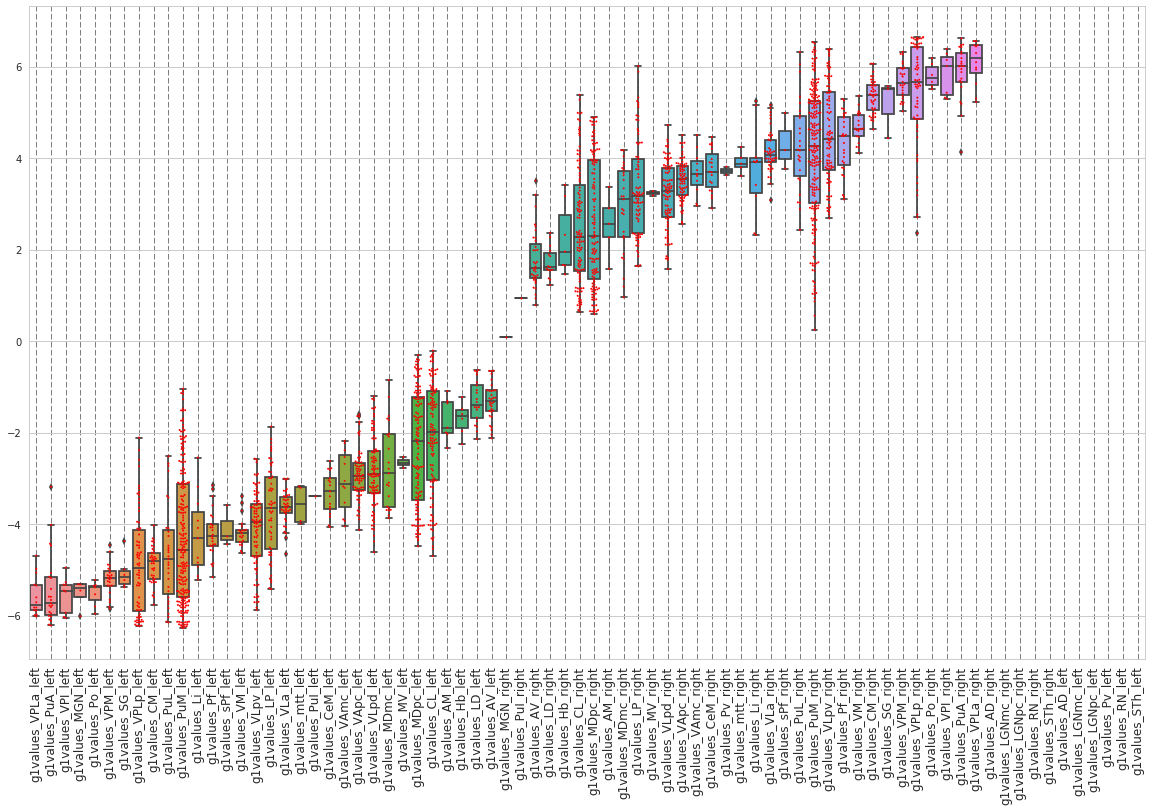

In [75]:
datatoplotsortedbymedian=[g1values_VPLa_left,g1values_PuA_left,g1values_VPI_left,g1values_MGN_left,g1values_Po_left,g1values_VPM_left,g1values_SG_left,g1values_VPLp_left,g1values_CM_left,g1values_PuL_left,g1values_PuM_left,g1values_Li_left,g1values_Pf_left,g1values_sPf_left,g1values_VM_left,g1values_VLpv_left,g1values_LP_left,g1values_VLa_left,g1values_mtt_left,g1values_PuI_left,g1values_CeM_left,g1values_VAmc_left,g1values_VApc_left,g1values_VLpd_left,g1values_MDmc_left,g1values_MV_left,g1values_MDpc_left,g1values_CL_left,g1values_AM_left,g1values_Hb_left,g1values_LD_left,g1values_AV_left,g1values_MGN_right,g1values_PuI_right,g1values_AV_right,g1values_LD_right,g1values_Hb_right,g1values_CL_right,g1values_MDpc_right,g1values_AM_right,g1values_MDmc_right,g1values_LP_right,g1values_MV_right,g1values_VLpd_right,g1values_VApc_right,g1values_VAmc_right,g1values_CeM_right,g1values_Pv_right,g1values_mtt_right,g1values_Li_right,g1values_VLa_right,g1values_sPf_right,g1values_PuL_right,g1values_PuM_right,g1values_VLpv_right,g1values_Pf_right,g1values_VM_right,g1values_CM_right,g1values_SG_right,g1values_VPM_right,g1values_VPLp_right,g1values_Po_right,g1values_VPI_right,g1values_PuA_right,g1values_VPLa_right,g1values_AD_right,g1values_LGNmc_right,g1values_LGNpc_right,g1values_RN_right,g1values_STh_right,g1values_AD_left,g1values_LGNmc_left,g1values_LGNpc_left,g1values_Pv_left,g1values_RN_left,g1values_STh_left]
labelssortedbymedian=['g1values_VPLa_left','g1values_PuA_left','g1values_VPI_left','g1values_MGN_left','g1values_Po_left','g1values_VPM_left','g1values_SG_left','g1values_VPLp_left','g1values_CM_left','g1values_PuL_left','g1values_PuM_left','g1values_Li_left','g1values_Pf_left','g1values_sPf_left','g1values_VM_left','g1values_VLpv_left','g1values_LP_left','g1values_VLa_left','g1values_mtt_left','g1values_PuI_left','g1values_CeM_left','g1values_VAmc_left','g1values_VApc_left','g1values_VLpd_left','g1values_MDmc_left','g1values_MV_left','g1values_MDpc_left','g1values_CL_left','g1values_AM_left','g1values_Hb_left','g1values_LD_left','g1values_AV_left','g1values_MGN_right','g1values_PuI_right','g1values_AV_right','g1values_LD_right','g1values_Hb_right','g1values_CL_right','g1values_MDpc_right','g1values_AM_right','g1values_MDmc_right','g1values_LP_right','g1values_MV_right','g1values_VLpd_right','g1values_VApc_right','g1values_VAmc_right','g1values_CeM_right','g1values_Pv_right','g1values_mtt_right','g1values_Li_right','g1values_VLa_right','g1values_sPf_right','g1values_PuL_right','g1values_PuM_right','g1values_VLpv_right','g1values_Pf_right','g1values_VM_right','g1values_CM_right','g1values_SG_right','g1values_VPM_right','g1values_VPLp_right','g1values_Po_right','g1values_VPI_right','g1values_PuA_right','g1values_VPLa_right','g1values_AD_right','g1values_LGNmc_right','g1values_LGNpc_right','g1values_RN_right','g1values_STh_right','g1values_AD_left','g1values_LGNmc_left','g1values_LGNpc_left','g1values_Pv_left','g1values_RN_left','g1values_STh_left']
#ax = sns.boxplot(data=datatoplot, whis=999999999, orient='h', saturation=0.8)
ax = sns.boxplot(data=datatoplotsortedbymedian, orient='v', saturation=0.8)
ax = sns.swarmplot(data=datatoplotsortedbymedian, orient='v', color='red', size=2)

#sns.set_palette(cols)
sns.set_style('whitegrid')
#ax.set_yticklabels(labels)
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
ax.set_xticklabels(labelssortedbymedian, rotation=90, fontsize = 12)
plt.rcParams["figure.figsize"] = (20, 12)
plt.show()